## Interface Inheritance example: SkLearn Models

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
boston_bunch = load_boston()
boston = pd.DataFrame(boston_bunch.data, columns=boston_bunch.feature_names)
boston["MEDV"] = boston_bunch.target

In [3]:
boston=boston.sample(frac=1) #randomize

In [4]:
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
105,0.13262,0.0,8.56,0.0,0.520,5.851,96.7,2.1069,5.0,384.0,20.9,394.05,16.47,19.5
367,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33,23.1
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,32.4
382,9.18702,0.0,18.10,0.0,0.700,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60,11.3
398,38.35180,0.0,18.10,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59,5.0
317,0.24522,0.0,9.90,0.0,0.544,5.782,71.7,4.0317,4.0,304.0,18.4,396.90,15.94,19.8
93,0.02875,28.0,15.04,0.0,0.464,6.211,28.9,3.6659,4.0,270.0,18.2,396.33,6.21,25.0
365,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12,27.5
103,0.21161,0.0,8.56,0.0,0.520,6.137,87.4,2.7147,5.0,384.0,20.9,394.47,13.44,19.3
142,3.32105,0.0,19.58,1.0,0.871,5.403,100.0,1.3216,5.0,403.0,14.7,396.90,26.82,13.4


Text(0, 0.5, 'Average home price (000 $)')

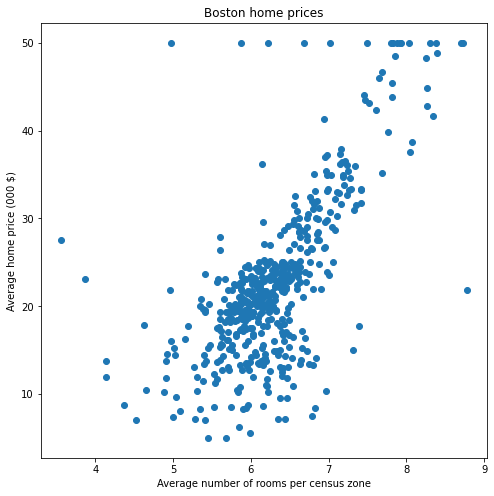

In [5]:
fig, ax= plt.subplots(figsize = (8,8))
ax.scatter(x =boston["RM"],y=boston["MEDV"])
ax.set_title("Boston home prices")
ax.set_xlabel("Average number of rooms per census zone")
ax.set_ylabel("Average home price (000 $)")

In [6]:
train_n = int(len(boston)*0.6)
X=boston[["RM"]]
y = boston["MEDV"]
X_train, X_test = X[:train_n],X[train_n:]
y_train,y_test = y[:train_n],y[train_n:]

In [7]:
linmodel = LinearRegression()
linmodel.fit(X_train,y_train)
yhat = linmodel.predict(X_test)

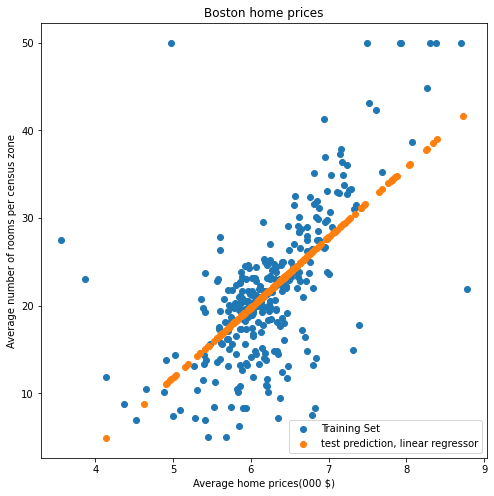

In [8]:
#print(yhat)
fig,ax = plt.subplots(figsize=(8,8))
plt.scatter(X_train,y_train, label = "Training Set")
plt.scatter(X_test,yhat,label = "test prediction, linear regressor")
ax.set_title("Boston home prices")
ax.set_ylabel("Average number of rooms per census zone")
ax.set_xlabel("Average home prices(000 $)")
ax.legend()

### Let's create our own class

In [10]:
from sklearn.base import BaseEstimator

class CharlesRiverRegressor (BaseEstimator):
    def fit(self,X,y=None):
        self.prices = {}
        self.prices[0] = y[X["CHAS"]==0.0].mean()
        self.prices[1]= y[X["CHAS"] ==1.0].mean()
        
    def predict(self,X):
        return [self.prices[x] for x in X["CHAS"].astype(int)]

In [11]:
train_n = int(len(boston)*0.6)
X=boston.drop("MEDV",axis = 1)
y=boston["MEDV"]
X_train,X_test = X[:train_n],X[train_n:]
y_train,y_test = y[:train_n],y[train_n:]

In [12]:
model = CharlesRiverRegressor()
model.fit(X_train,y_train)

In [13]:
model.prices

{0: 21.257394366197172, 1: 27.252631578947366}

In [14]:
yhat = model.predict(X_test)

No handles with labels found to put in legend.


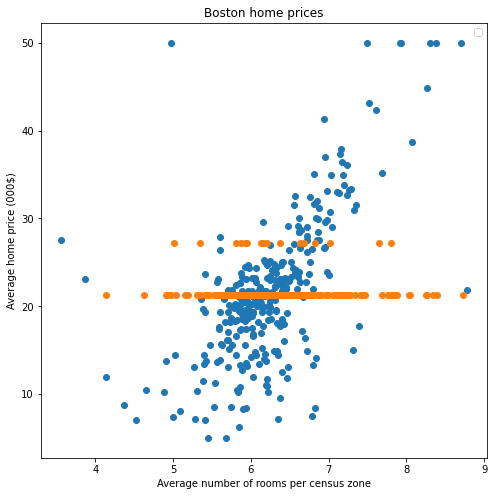

In [15]:
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(X_train.RM, y_train)
ax.scatter(X_test.RM, yhat)
ax.set_title("Boston home prices")
ax.set_xlabel("Average number of rooms per census zone")
ax.set_ylabel("Average home price (000$)")
ax.legend()

#### Not too good but this is a start of developing our own models

In [17]:
from sklearn.model_selection import cross_val_score

In [19]:
print(cross_val_score(linmodel,X,y,cv=5,scoring='neg_mean_squared_error').mean())
print(cross_val_score(model,X,y,cv=5,scoring='neg_mean_squared_error').mean())

-23.96015047398813
-82.95148575376422
